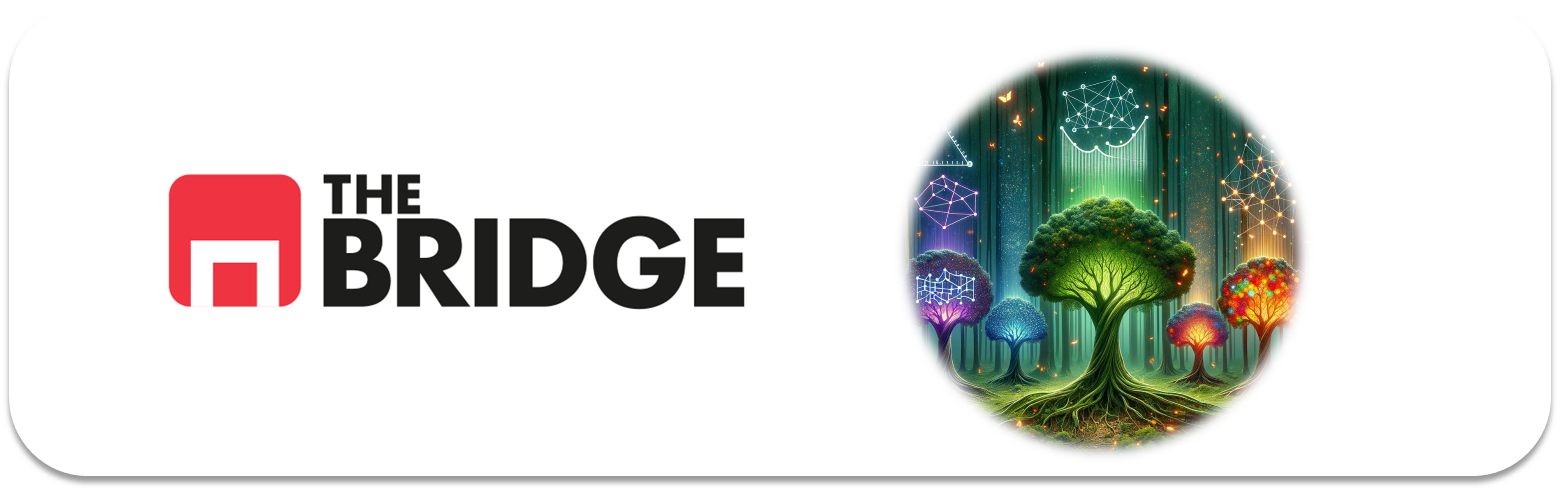

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [215]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

In [171]:
df_bank = pd.read_csv("./data/bank-full.csv", delimiter=";")
#Cargamos el data

In [172]:
df_bank.head(20)
#Echamos un vistazo

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [173]:
df_bank.info()
#Vemos información de las columnas y sus datos por si tienen nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [174]:
#Vamos a elegir como Target "poutcome"
df_bank.poutcome.value_counts(True)

poutcome
unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: proportion, dtype: float64

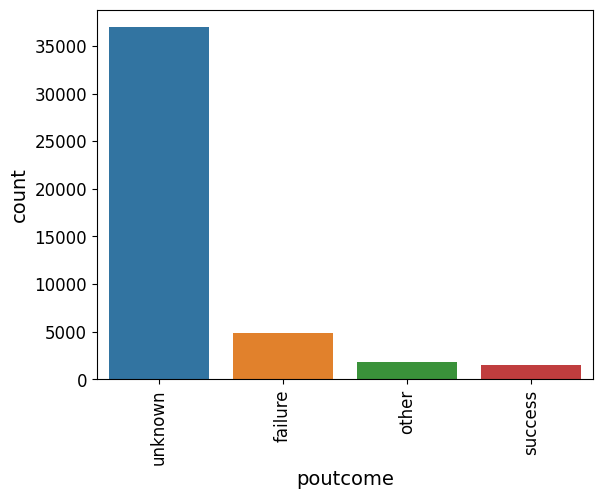

In [175]:
sns.countplot(x = "poutcome", data = df_bank, hue = "poutcome");
plt.xticks(rotation=90);

In [176]:
#Con esta funcion pasamos todas las columnas a numericas
from sklearn.preprocessing import LabelEncoder

def convertir_objetos_a_numericas(df):
    # Selecciona las columnas de tipo objeto
    columnas_objeto = df.select_dtypes(include=['object']).columns.tolist()
    
    # Crea un nuevo DataFrame para almacenar las variables numéricas
    df_numericas = df.copy()
    
    # Itera sobre las columnas de tipo objeto y aplica Label Encoding
    for columna in columnas_objeto:
        label_encoder = LabelEncoder()
        df_numericas[columna] = label_encoder.fit_transform(df[columna])
    
    return df_numericas

In [177]:
df_bank = convertir_objetos_a_numericas(df_bank)

In [178]:

train_set, test_set = train_test_split(df_bank, test_size= 0.2, stratify= df_bank["poutcome"], random_state= 42)

In [179]:
train_set["poutcome"].value_counts(normalize = True)

poutcome
3    0.817463
0    0.108411
1    0.040699
2    0.033427
Name: proportion, dtype: float64

In [180]:
test_set["poutcome"].value_counts(normalize = True)

poutcome
3    0.817538
0    0.108371
1    0.040694
2    0.033396
Name: proportion, dtype: float64

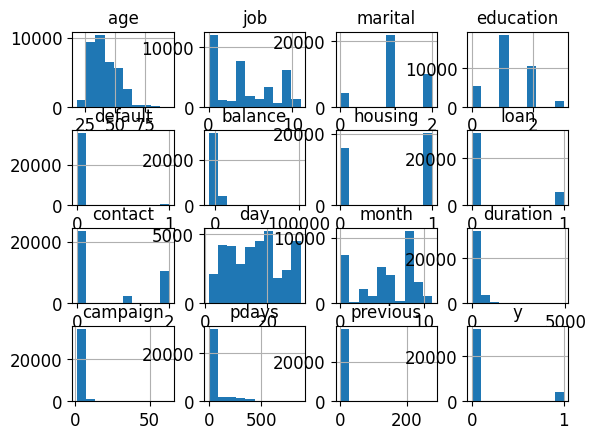

In [181]:
#Mini EDA
train_set.drop("poutcome", axis = 1).hist()
plt.show()

In [182]:
df_bank.corr(numeric_only= True)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


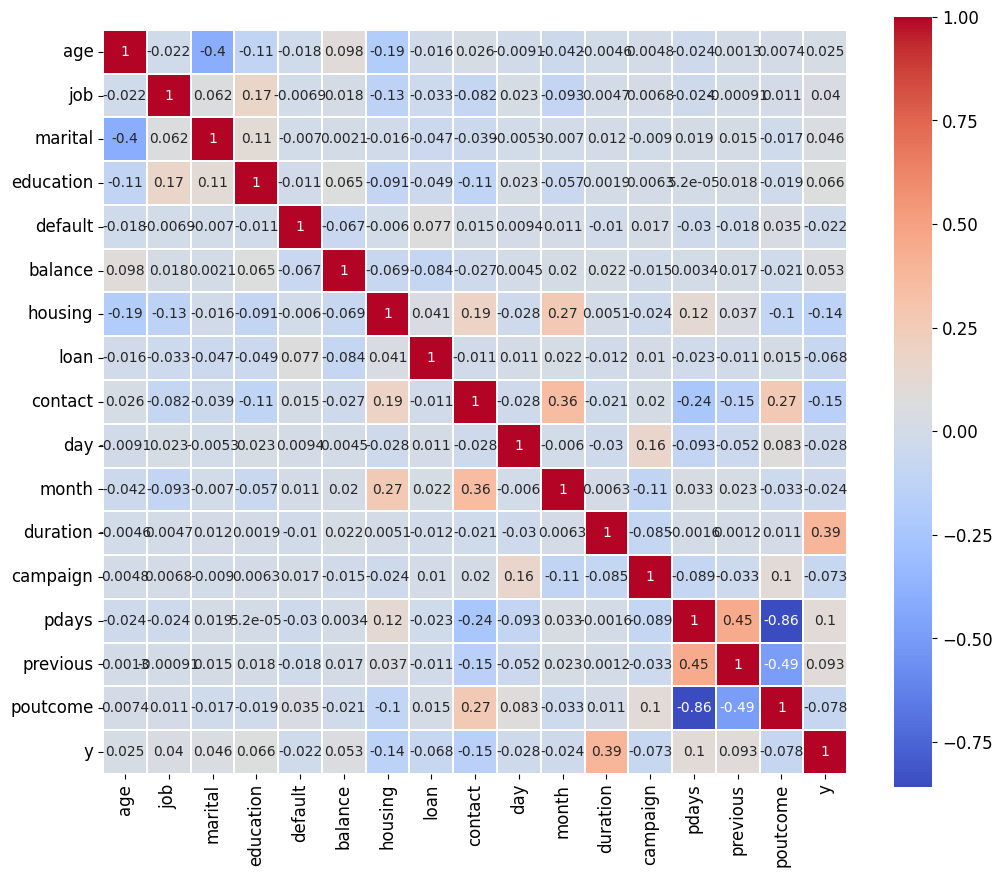

In [183]:
plt.figure(figsize=(12, 10))

sns.heatmap(df_bank.corr(numeric_only = True), annot=True, cmap='coolwarm',  annot_kws={"size": 10}, linewidths=0.1, square=True);
plt.show();

In [184]:
features = train_set.drop(["job","age","marital","default","balance","loan","day","month","duration","y","education","poutcome"], axis = 1).columns.to_list()
print(features)

['housing', 'contact', 'campaign', 'pdays', 'previous']


### Procesamiento de Features

In [185]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_set[features]) # Adaptamos el StandarScaler al Train, pero luego usamos el mismo en el test (porque ya la media y la desviación son las del train)
X_train = pd.DataFrame(scaler.transform(train_set[features]), columns = features)
X_test = pd.DataFrame(scaler.transform(test_set[features]), columns= features)
X_train.describe()

,housing,contact,campaign,pdays,previous
count,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04
mean,1.249461e-16,4.518492e-18,-3.958592e-17,2.259246e-17,-4.233631e-17
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.118451e+00,-7.145756e-01,-5.662049e-01,-4.103807e-01,-2.441306e-01
25%,-1.118451e+00,-7.145756e-01,-5.662049e-01,-4.103807e-01,-2.441306e-01
50%,8.940934e-01,-7.145756e-01,-2.432206e-01,-4.103807e-01,-2.441306e-01
75%,8.940934e-01,1.511503e+00,7.976377e-02,-4.103807e-01,-2.441306e-01
max,8.940934e-01,1.511503e+00,1.945882e+01,8.333023e+00,1.167987e+02


In [186]:
y_train = train_set["poutcome"]
y_test = test_set["poutcome"]

### Creamos el modelo

In [187]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000) 

clf.fit(X_train, y_train) # No hay que decir nada en especial, el detecta el tipo de clasificador multicategórico y aplica el one-vs-rest o one-vs-all

LogisticRegression(max_iter=10000)

In [188]:
clf.coef_

array([[  0.22628368,  -0.3134341 ,  -0.19898297,   1.17315811,
          3.39283898],
       [  0.10934888,  -0.06429716,   0.26721051,   1.10819975,
          3.53235758],
       [ -0.43251147,  -0.24447672,  -0.4527663 ,   0.70551813,
          3.44078413],
       [  0.09687891,   0.62220799,   0.38453876,  -2.98687599,
        -10.36598069]])

Podemos ver las predicciones

In [189]:
clf.predict(X_train)

array([3, 3, 0, ..., 3, 3, 3])

In [190]:
clf.predict_proba(X_train)

array([[8.84327137e-04, 3.25993484e-04, 3.12294325e-04, 9.98477385e-01],
       [1.33185141e-04, 7.35389882e-05, 5.95211554e-05, 9.99733755e-01],
       [4.68105513e-01, 2.23477215e-01, 3.08417271e-01, 4.11731232e-14],
       ...,
       [8.22250139e-04, 3.29922677e-04, 1.18676507e-03, 9.97661062e-01],
       [8.22250139e-04, 3.29922677e-04, 1.18676507e-03, 9.97661062e-01],
       [1.28833948e-03, 3.51431000e-04, 5.36016289e-04, 9.97824213e-01]])

In [191]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, clf.predict(X_train))
print(acc_train)

0.9263990267639902


In [192]:
from sklearn import model_selection
name='Logistic Regression'
cv_results = model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.9288084  0.92770252 0.92424661 0.92548044 0.92534218]
Logistic Regression: 0.926316 (0.001677)


### Evaluación del modelo

In [193]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, balanced_accuracy_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

In [194]:
y_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

#### Matriz de confusion

In [195]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[f"Real {i}" for i in clf.classes_], 
                  columns=[f"Predicho {i}" for i in clf.classes_])

cm

,Predicho 0,Predicho 1,Predicho 2,Predicho 3
Real 0,893,24,59,4
Real 1,309,22,29,8
Real 2,231,3,66,2
Real 3,1,0,0,7392


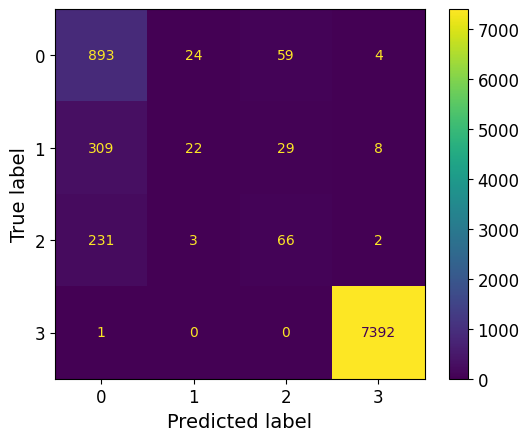

In [196]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

c:\Users\raul_\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


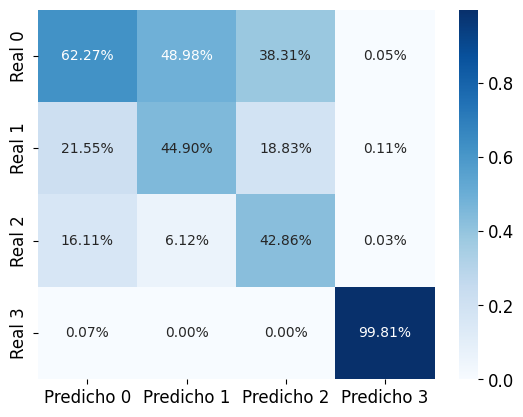

In [197]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues');

### Métricas MACRO y MICRO

In [198]:
micro_prec = precision_score(y_test, y_pred, average="micro")
print("MICRO PRECISION:", micro_prec)

macro_prec = precision_score(y_test, y_pred, average="macro")
print("MACRO PRECISION:", macro_prec)

micro_rec = recall_score(y_test, y_pred, average="micro")
print("MICRO RECALL:", micro_rec)

macro_rec = recall_score(y_test, y_pred, average="macro")
print("MACRO RECALL:", macro_rec)

micro_acc = accuracy_score(y_test, y_pred)
print("MICRO ACCURACY:", micro_acc)

MICRO PRECISION: 0.9259095432931549
MACRO PRECISION: 0.6245985683783206
MICRO RECALL: 0.9259095432931549
MACRO RECALL: 0.5473537204406207
MICRO ACCURACY: 0.9259095432931549


In [199]:
acierto = accuracy_score(y_test, y_pred)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 92.59 %
Error: 7.41 %


In [200]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.91      0.74       980
           1       0.45      0.06      0.11       368
           2       0.43      0.22      0.29       302
           3       1.00      1.00      1.00      7393

    accuracy                           0.93      9043
   macro avg       0.62      0.55      0.53      9043
weighted avg       0.92      0.93      0.91      9043



## Árboles de decisión: Clasificación

In [211]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [208]:

X = df_bank[['housing', 'contact', 'campaign', 'pdays', 'previous']]
y = df_bank.poutcome

In [209]:
tree_clf = DecisionTreeClassifier(max_depth=2,
                                  random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [217]:
tree_clf.predict_proba([[0.1, 1,2,2,2]])

c:\Users\raul_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.45939005, 0.20577849, 0.33386838, 0.00096308]])

In [219]:
tree_clf.predict([[0.1, 1,2,2,2]])

c:\Users\raul_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

### Instanciación y entrenamiento


In [220]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42) # De nuevo sólo un hiperparámetro, para controlar la profundidad o número de niveles del árbol
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [223]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = tree_reg.predict(X)

print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

MAE: 0.11957288805467824
RMSE: 0.32035739656631257


In [224]:
tree_reg_bis = DecisionTreeRegressor(max_depth=3, random_state=42) # De nuevo sólo un hiperparámetro, para controlar la profundidad o número de niveles del árbol
tree_reg_bis.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [225]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = tree_reg_bis.predict(X)

print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

MAE: 0.1146612025241471
RMSE: 0.31209803513539536


In [227]:
from sklearn.model_selection import cross_val_score

level_2 = np.sqrt(-cross_val_score(tree_reg, X, y, cv = 5, scoring= "neg_mean_squared_error"))
level_3 = np.sqrt(-cross_val_score(tree_reg_bis, X, y, cv = 5, scoring = "neg_mean_squared_error"))

print("Arbol 2 niveles:", level_2.mean())
print("Arbol 3 niveles:", level_3.mean())

Arbol 2 niveles: 0.2575190337620398
Arbol 3 niveles: 0.2515575849562822


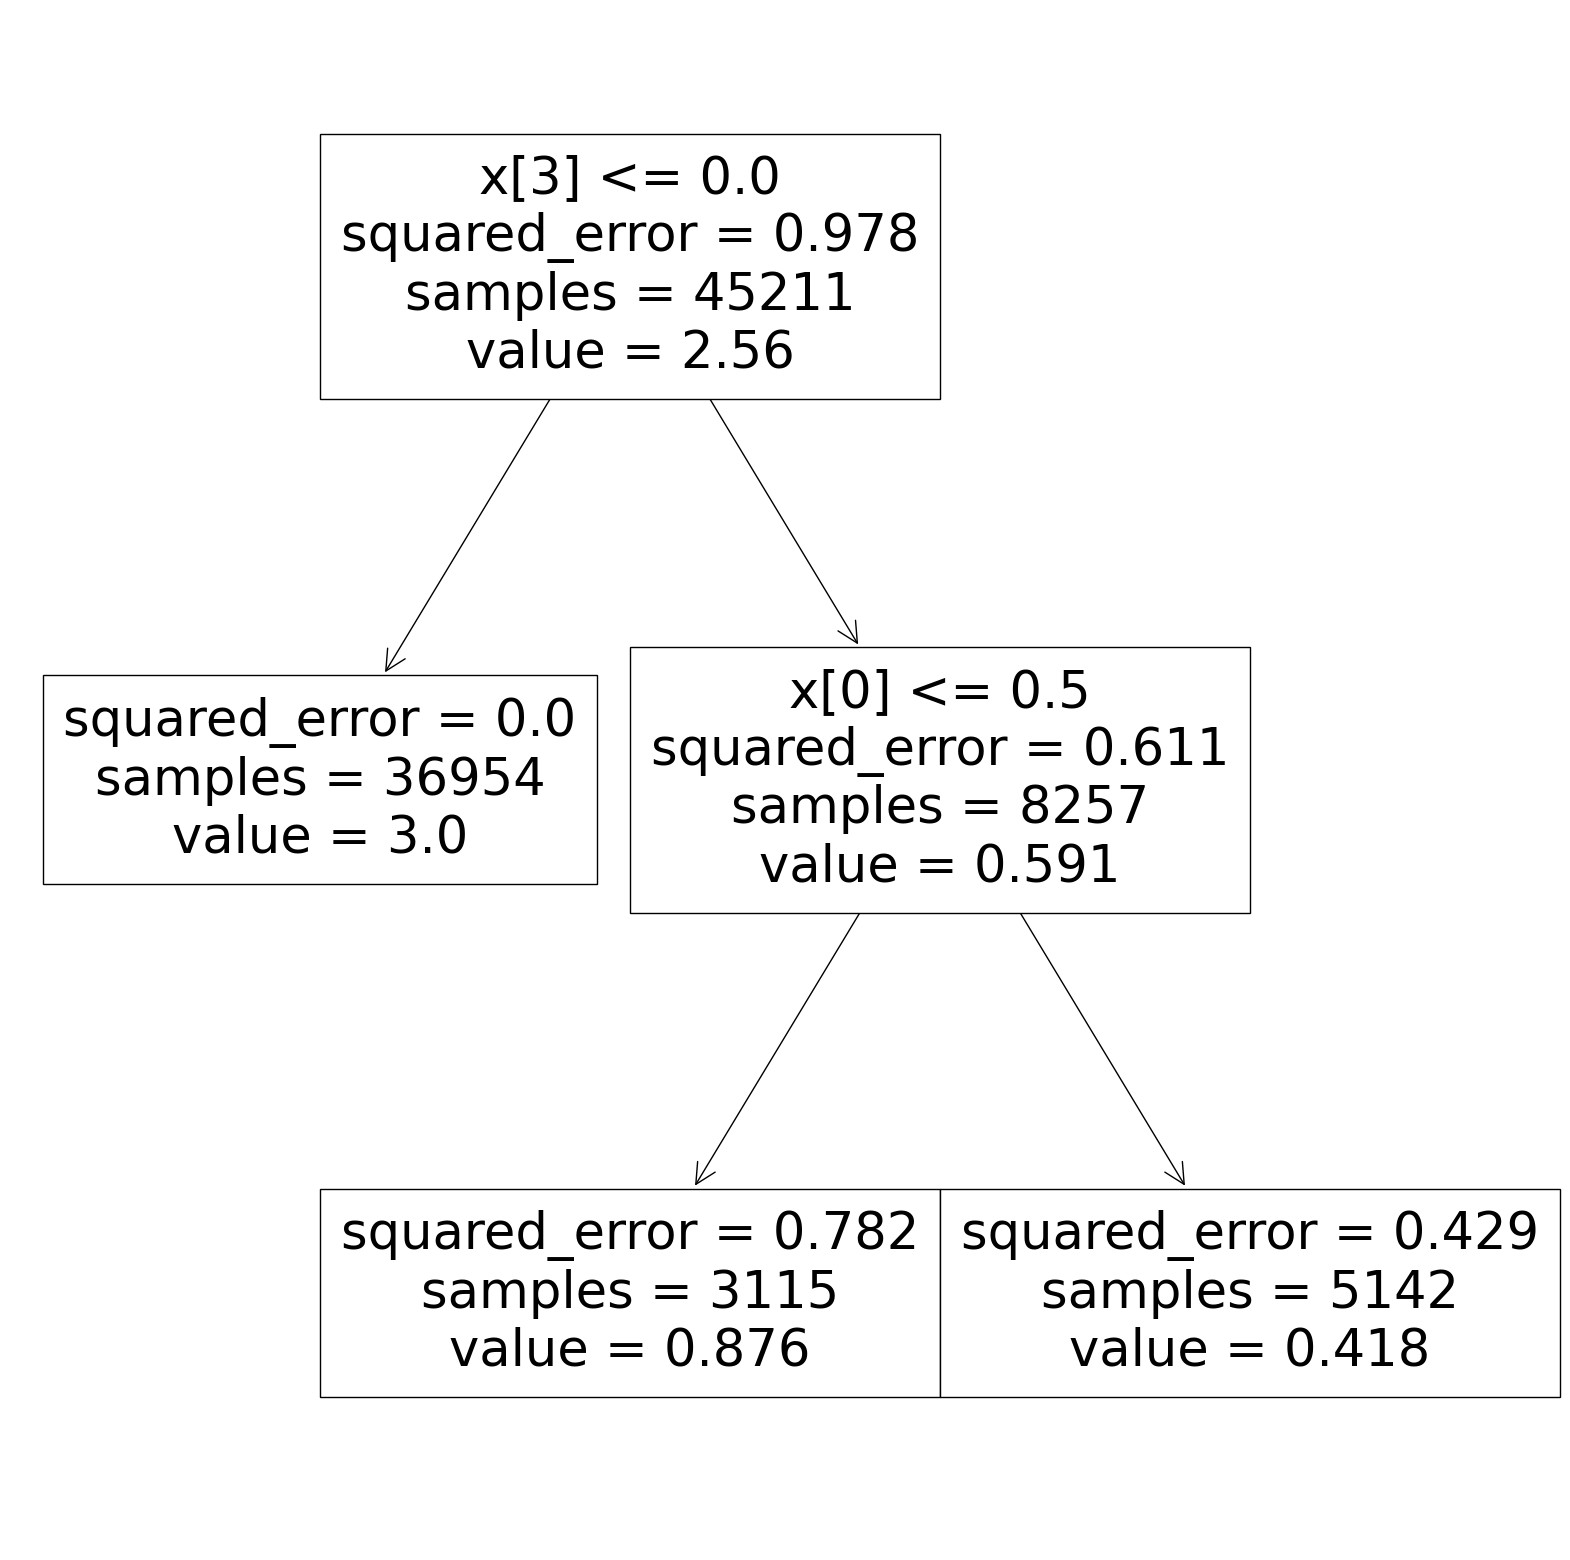

In [228]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(tree_reg);

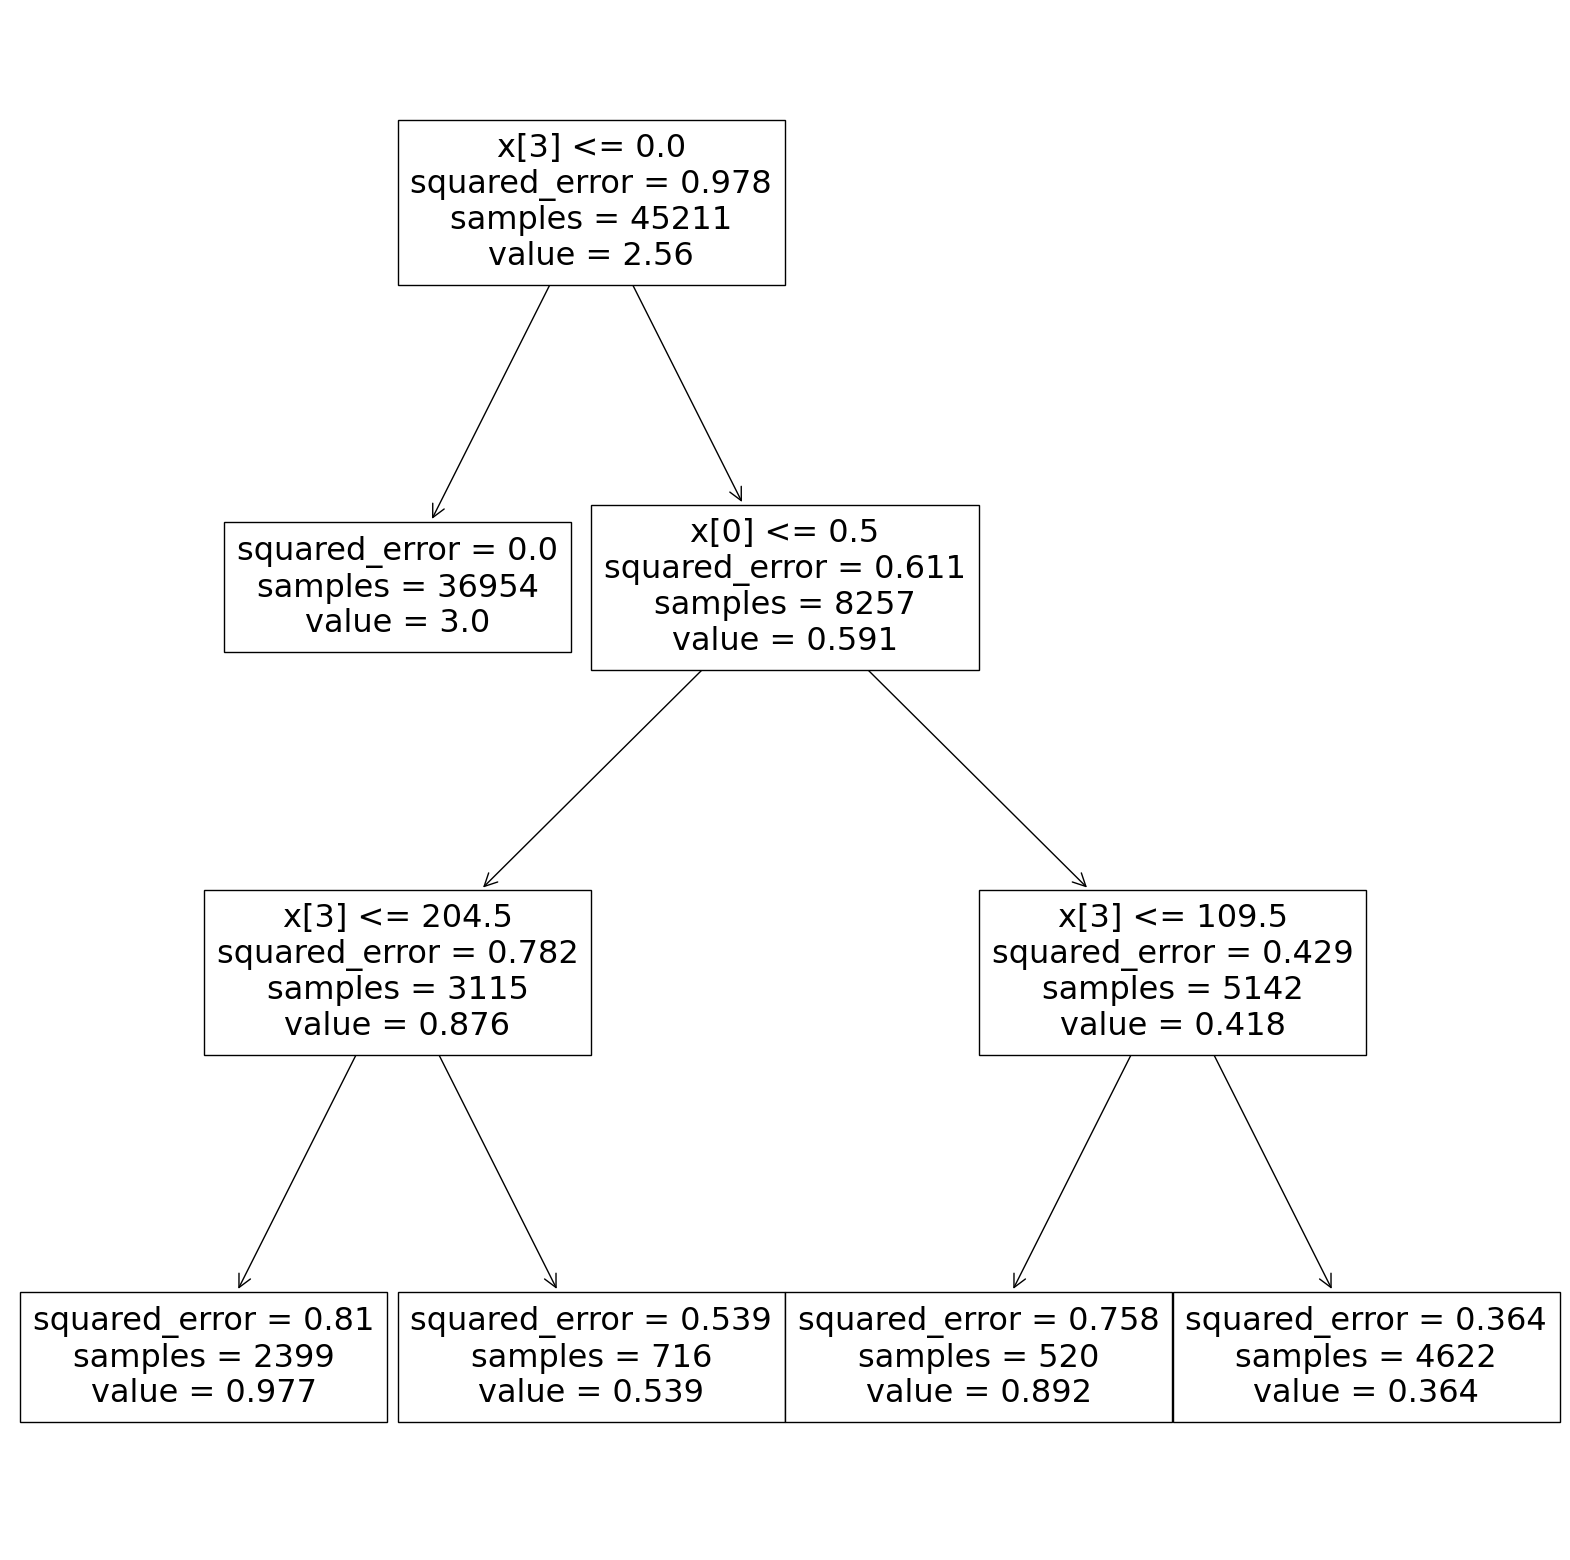

In [229]:

plt.figure(figsize=(20,20))
plot_tree(tree_reg_bis);

### Overfitting


In [230]:
tree_reg_limitless = DecisionTreeRegressor(random_state=42) # Sin restricciones en el número de niveles del árbol
tree_reg_min_leaf = DecisionTreeRegressor(random_state=42, min_samples_leaf=10) # Restringidos los niveles a que no haya hojas con menos de 10 elementos
tree_reg_limitless.fit(X, y)
tree_reg_min_leaf.fit(X, y)

DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

In [231]:
y_pred = tree_reg_limitless.predict(X)

print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

MAE: 0.04041089302368874
RMSE: 0.1822320224111674


In [232]:
y_pred = tree_reg_min_leaf.predict(X)

print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

MAE: 0.09563482105260437
RMSE: 0.2790830315476575


In [233]:
level_2 = np.sqrt(-cross_val_score(tree_reg_limitless, X, y, cv = 5, scoring= "neg_mean_squared_error"))
level_3 = np.sqrt(-cross_val_score(tree_reg_min_leaf, X, y, cv = 5, scoring = "neg_mean_squared_error"))

print("Arbol a lo suyo:", level_2.mean())
print("Arbol con limite en las hojas:", level_3.mean())

Arbol a lo suyo: 0.3198972045634737
Arbol con limite en las hojas: 0.2628952114315338


## Árboles de decisión: Regresión

In [234]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42) # De nuevo sólo un hiperparámetro, para controlar la profundidad o número de niveles del árbol
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [235]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = tree_reg.predict(X)

print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

MAE: 0.11957288805467824
RMSE: 0.32035739656631257


In [236]:
tree_reg_bis = DecisionTreeRegressor(max_depth=3, random_state=42) # De nuevo sólo un hiperparámetro, para controlar la profundidad o número de niveles del árbol
tree_reg_bis.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [237]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = tree_reg_bis.predict(X)

print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

MAE: 0.1146612025241471
RMSE: 0.31209803513539536


In [238]:
from sklearn.model_selection import cross_val_score

level_2 = np.sqrt(-cross_val_score(tree_reg, X, y, cv = 5, scoring= "neg_mean_squared_error"))
level_3 = np.sqrt(-cross_val_score(tree_reg_bis, X, y, cv = 5, scoring = "neg_mean_squared_error"))

print("Arbol 2 niveles:", level_2.mean())
print("Arbol 3 niveles:", level_3.mean())

Arbol 2 niveles: 0.2575190337620398
Arbol 3 niveles: 0.2515575849562822


**Sin límites, train error**

In [239]:
y_pred = tree_reg_limitless.predict(X)

print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

MAE: 0.04041089302368874
RMSE: 0.1822320224111674


**Con minimo número de muestras por hoja, train error**

In [240]:
y_pred = tree_reg_min_leaf.predict(X)

print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

MAE: 0.09563482105260437
RMSE: 0.2790830315476575


**Score en validación cruzada**

In [241]:
level_2 = np.sqrt(-cross_val_score(tree_reg_limitless, X, y, cv = 5, scoring= "neg_mean_squared_error"))
level_3 = np.sqrt(-cross_val_score(tree_reg_min_leaf, X, y, cv = 5, scoring = "neg_mean_squared_error"))

print("Arbol a lo suyo:", level_2.mean())
print("Arbol con limite en las hojas:", level_3.mean())

Arbol a lo suyo: 0.3198972045634737
Arbol con limite en las hojas: 0.2628952114315338


## AJUSTE DE HIPERPARAMETROS DE FORMA PRACTICA

In [244]:

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import ElasticNet
import numpy as np

## Random Search

In [245]:
param_grid = {
    'alpha': [1e-10, 1e-4, 1e-2, 1, 5, 10, 20, 40],
    'l1_ratio': np.arange(0,1,0.01)
}

elastic = ElasticNet()

random_search = RandomizedSearchCV(elastic, # El modelo que quiero entrenar
                                   param_grid, # El grid de parámetros
                                   random_state=1, # Semilla
                                   n_iter=100, # Nº de iteraciones del random search
                                   cv=5, # Folds del cross validation
                                   scoring="neg_root_mean_squared_error", # Métrica que quiero optimizar
                                   n_jobs = -1 # Paralelizar
                                  )

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=ElasticNet(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [1e-10, 0.0001, 0.01, 1, 5, 10,
                                                  20, 40],
                                        'l1_ratio': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
                   random_state=1, scoring='neg_root_mean_squared_error')

In [246]:
# Mejores parámetros del modelo
random_search.best_params_

{'l1_ratio': 0.9400000000000001, 'alpha': 0.01}

In [247]:
# Mejor score (R2)
random_search.best_score_**2

0.25889935399578373

In [249]:
# random_search.best_estimator_ contiene el mejor modelo
random_search.best_estimator_.coef_

array([-5.20193797e-04,  5.57689435e-02,  1.81386509e-02, -7.70736638e-01,
       -1.14479026e-01])

In [250]:
random_search.best_estimator_.score(X_test, y_test)

0.7735995256221553

## Grid Search

In [252]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [1e-10, 1e-4, 1e-2, 1, 5, 10, 20, 40],
    'l1_ratio': np.arange(0, 1, 0.01)
}

elastic = ElasticNet()

grid_search = GridSearchCV(elastic,
                           param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1
                          )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1e-10, 0.0001, 0.01, 1, 5, 10, 20, 40],
                         'l1_ratio': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             scoring='r2')

In [253]:
grid_search.best_params_

{'alpha': 0.01, 'l1_ratio': 0.99}

In [254]:
grid_search.best_score_

0.7349233664600783

In [255]:
# R2 en test
grid_search.best_estimator_.score(X_test, y_test)

0.7735763141507763

## Bayesian Search

In [259]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score


In [260]:
def hyperopt_train_test(params, scoring = "r2"):
    model = ElasticNet(**params)
    return cross_val_score(model, X_train, y_train, 
                           cv=5, scoring= scoring).mean() # Aquí la métrica es r2 pero podemos poner la que queramos de las admitidas por la validación cruzada de sklearn


# Defininmos el "grid" (hiperparámetros y rango de valores)
space = {
    'alpha': hp.uniform('alpha', 0.0001, 1.0),
    'l1_ratio': hp.uniform('l1_ratio', 0.0001, 1.0)
}

def f(params):
    r2 = hyperopt_train_test(params)
    return {'loss':-r2, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=100, trials=trials)

100%|██████████| 100/100 [00:04<00:00, 22.08trial/s, best loss: -0.7356954176227029]


In [261]:
best # Esto nos devuelve la combinación optima encontrada 

{'alpha': 0.03229908364996034, 'l1_ratio': 0.984796780449692}

In [262]:
model_bayes = ElasticNet(alpha=best['alpha'], l1_ratio=best['l1_ratio'])
model_bayes.fit(X_train, y_train)
model_bayes.score(X_test, y_test)

0.7714443283110677